# ClusterAI 2020
Ciencia de Datos - Ingenieria Industrial UTN BA
Curso I5521

## Importación de Librerias

In [1]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
file = 'base_estudio_discapacidad_2018.csv'

In [4]:
estudio = pd.read_csv(file, engine = 'python', error_bad_lines=False, delimiter= ';')

# Uso engine= 'python' y Erro_bad_lines = False porque sino tira un error al leer cierto tipo de lineas.

# Error_bad_lines lo uso para.Las líneas con demasiados campos (por ejemplo, una línea csv con demasiadas comas) 
# provocarán de forma predeterminada que se genere una excepción y no se devolverá ningún DataFrame. 
# Si es False, estas "líneas incorrectas" se eliminarán del DataFrame que se devuelve.

# Engine = 'python' lo uso para cuando
# Se genera una advertencia al leer un archivo que no usa el analizador 'c' predeterminado.
# Ocurre debido a la falta de soporte o funcionalidad para analizar un atributo particular de un archivo CSV con el motor solicitado.
# La advertencia se puede evitar agregando engine = 'python' como parámetro en los métodos pd.read_csv y pd.read_table .

# Uso delimiter=';' para separar las columnas al leerlas

In [5]:
# Nos quedamos con las variables/features que nos interesan del Dataset

estudio_dif = estudio[['personas_hogar', 'Sexo' , 'hogar_dificultad', 'personas_dificultad_hogar' , 'tipo_hogar' , 'edad_agrupada', 'Cantidad de dificultades' , 'Cantidad y tipo de dificultad' , 'edad_inicio' , 'Cobertura de salud' , 'Sabe leer y escribir' , 'Máximo nivel educativo alcanzado' ,'Condición de actividad']]



In [6]:
# Filtramos el Dataset por las personas con dificultades (discapacidad) que son el grupo que vamos a estudiar

estudio_disca = estudio_dif.loc[estudio['hogar_dificultad']== 'Hogares con personas con dificultad']



In [7]:
# Filtramos el Dataset por Edad y dejamos los grupos que tienen personas en edad Laboral "14 a 39 años" y "40 a 64 años"

estudio_discapacidad = estudio_disca.loc[(estudio['edad_agrupada'] != '0 a 5 años') & (estudio['edad_agrupada'] != '6 a 13 años') & (estudio['edad_agrupada'] != '65 años y más') ]

In [8]:
np.shape(estudio_discapacidad)

(13787, 13)

In [9]:
# Sabemos que hay valores vacios en la columna 'Condición de actividad' entonces los convertimos a Nans

estudio_discapacidad['Condición de actividad'].replace(' ', np.nan, inplace=True)


In [10]:
# Verificamos los Nans en las columnas

col_NaN = estudio_discapacidad.isnull().any()
print(col_NaN,'\r\n')

personas_hogar                      False
Sexo                                False
hogar_dificultad                    False
personas_dificultad_hogar           False
tipo_hogar                          False
edad_agrupada                       False
Cantidad de dificultades            False
Cantidad y tipo de dificultad       False
edad_inicio                         False
Cobertura de salud                  False
Sabe leer y escribir                False
Máximo nivel educativo alcanzado    False
Condición de actividad               True
dtype: bool 



In [11]:
# Limpiamos registros con '.dropna'

estudio_discapacidad.dropna(how ='any', inplace = True)

In [12]:
#Nos fijamos como quedo conformado nuestro Dataset. Cuantas muestras quedaron luego del filtro.

np.shape(estudio_discapacidad)

(4389, 13)

In [13]:
# Pasamos los valores de 'Cantidad de dificultades' de varriables object a numeros 'int'

estudio_discapacidad['Cantidad de dificultades'] = estudio_discapacidad['Cantidad de dificultades'].astype(int)

In [14]:
# Sabemos que hay valores vacios entonces los convertimos a Nans

estudio_discapacidad['Máximo nivel educativo alcanzado'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['personas_hogar'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Sexo'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['hogar_dificultad'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['tipo_hogar'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['edad_agrupada'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Cantidad de dificultades'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Cantidad y tipo de dificultad'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['edad_inicio'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Cobertura de salud'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Sabe leer y escribir'].replace(' ', np.nan, inplace=True)


In [15]:
# Verificamos los Nans en las columnas

col_NaN = estudio_discapacidad.isnull().any()
print(col_NaN,'\r\n')

personas_hogar                      False
Sexo                                False
hogar_dificultad                    False
personas_dificultad_hogar           False
tipo_hogar                          False
edad_agrupada                       False
Cantidad de dificultades            False
Cantidad y tipo de dificultad       False
edad_inicio                          True
Cobertura de salud                  False
Sabe leer y escribir                False
Máximo nivel educativo alcanzado     True
Condición de actividad              False
dtype: bool 



In [16]:
# Rellenamos para los valores Nans de la columna 'Maximo nivel educativo alcanzado' con la leyenda 'No especifica nivel/ignorado'

estudio_discapacidad["Máximo nivel educativo alcanzado"].fillna("No especifica nivel/ignorado", inplace = True) 

# Rellenamos la columna 'edad_inicio' con la moda para los valores Nans

estudio_discapacidad['edad_inicio'] = estudio_discapacidad['edad_inicio'].fillna(estudio_discapacidad['edad_inicio'].mode()[0])

In [17]:
#Revisamos si quedaron valores nulos
nulo_ratio = (estudio_discapacidad.isnull().sum() / len(estudio_discapacidad)) * 100
nulo_ratio

personas_hogar                      0.0
Sexo                                0.0
hogar_dificultad                    0.0
personas_dificultad_hogar           0.0
tipo_hogar                          0.0
edad_agrupada                       0.0
Cantidad de dificultades            0.0
Cantidad y tipo de dificultad       0.0
edad_inicio                         0.0
Cobertura de salud                  0.0
Sabe leer y escribir                0.0
Máximo nivel educativo alcanzado    0.0
Condición de actividad              0.0
dtype: float64

In [18]:
filas = np.shape(estudio_discapacidad)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(estudio_discapacidad)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}\r\n')


estudio_discapacidad.head(5)

Filas: 4389
Columnas: 13



,personas_hogar,Sexo,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,edad_agrupada,Cantidad de dificultades,Cantidad y tipo de dificultad,edad_inicio,Cobertura de salud,Sabe leer y escribir,Máximo nivel educativo alcanzado,Condición de actividad
13,2,Varón,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,40 a 64 años,4,Solo certificado,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo
15,1,Varón,Hogares con personas con dificultad,1,Hogar unipersonal,40 a 64 años,2,Dos dificultades,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo
92,3,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,14 a 39 años,3,Tres dificultades o más,40 a 64 años,Obra social o PAMI,No,No especifica nivel/ignorado,Inactivo
138,3,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,40 a 64 años,2,Dos dificultades,Todavía no había cumplido el año,Obra social o PAMI,Sí,"Superior no universitario, universitario y pos...",Inactivo
151,7,Mujer,Hogares con personas con dificultad,2,Hogar multipersonal familiar extendido,40 a 64 años,1,Solo visual,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo


In [19]:
ml_estudio = pd.get_dummies(estudio_discapacidad.iloc[:,1:-1])

In [20]:
ml_estudio.head(3)

,Cantidad de dificultades,Sexo_Mujer,Sexo_Varón,hogar_dificultad_Hogares con personas con dificultad,personas_dificultad_hogar_1,personas_dificultad_hogar_2,personas_dificultad_hogar_3,tipo_hogar_Hogar multipersonal familiar compuesto,tipo_hogar_Hogar multipersonal familiar extendido,tipo_hogar_Hogar multipersonal familiar nuclear,...,Cobertura de salud_Prepaga a través de una obra social o solo por contratación voluntaria,"Cobertura de salud_Programas o planes estatales de salud (incluir Salud, ex PROFE)",Sabe leer y escribir_No,Sabe leer y escribir_Sí,Máximo nivel educativo alcanzado_Educación integral,Máximo nivel educativo alcanzado_Hasta primario completo,Máximo nivel educativo alcanzado_No especifica nivel/ignorado,Máximo nivel educativo alcanzado_Secundario completo,Máximo nivel educativo alcanzado_Secundario incompleto,"Máximo nivel educativo alcanzado_Superior no universitario, universitario y posgrado incompleto y completo"
13,4,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
15,2,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
92,3,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [21]:
condicion = estudio_discapacidad.iloc[:,-1]

In [22]:
ml_estudio = pd.concat([ml_estudio, condicion], axis=1)

In [23]:
ml_estudio.head()

,Cantidad de dificultades,Sexo_Mujer,Sexo_Varón,hogar_dificultad_Hogares con personas con dificultad,personas_dificultad_hogar_1,personas_dificultad_hogar_2,personas_dificultad_hogar_3,tipo_hogar_Hogar multipersonal familiar compuesto,tipo_hogar_Hogar multipersonal familiar extendido,tipo_hogar_Hogar multipersonal familiar nuclear,...,"Cobertura de salud_Programas o planes estatales de salud (incluir Salud, ex PROFE)",Sabe leer y escribir_No,Sabe leer y escribir_Sí,Máximo nivel educativo alcanzado_Educación integral,Máximo nivel educativo alcanzado_Hasta primario completo,Máximo nivel educativo alcanzado_No especifica nivel/ignorado,Máximo nivel educativo alcanzado_Secundario completo,Máximo nivel educativo alcanzado_Secundario incompleto,"Máximo nivel educativo alcanzado_Superior no universitario, universitario y posgrado incompleto y completo",Condición de actividad
13,4,0,1,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Inactivo
15,2,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Inactivo
92,3,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,Inactivo
138,2,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,Inactivo
151,1,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Inactivo


In [24]:
# Guardamos feature matrix en "X"
X = ml_estudio.iloc[:,0:-1]                          # slicing: todas las filas y columnas 1 a 4

# Guardamos target vector in "y"
y = ml_estudio.iloc[:,-1] 

In [25]:
print(y.shape)
print(X.shape)

(4389,)
(4389, 40)


In [26]:
# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
le = preprocessing.LabelEncoder()

# 2 - AL objeto le aplico la funcion fit a los datos desados 
y=le.fit_transform(y)

# 3 - Agregamos la nueva columna a nuestro data set 
ml_estudio['Encoded Condition'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
ml_estudio.tail(10)

Classes: ['Desocupado' 'Inactivo' 'Ocupado']
Response variable after encoding: [1 1 1 ... 2 2 1]


,Cantidad de dificultades,Sexo_Mujer,Sexo_Varón,hogar_dificultad_Hogares con personas con dificultad,personas_dificultad_hogar_1,personas_dificultad_hogar_2,personas_dificultad_hogar_3,tipo_hogar_Hogar multipersonal familiar compuesto,tipo_hogar_Hogar multipersonal familiar extendido,tipo_hogar_Hogar multipersonal familiar nuclear,...,Sabe leer y escribir_No,Sabe leer y escribir_Sí,Máximo nivel educativo alcanzado_Educación integral,Máximo nivel educativo alcanzado_Hasta primario completo,Máximo nivel educativo alcanzado_No especifica nivel/ignorado,Máximo nivel educativo alcanzado_Secundario completo,Máximo nivel educativo alcanzado_Secundario incompleto,"Máximo nivel educativo alcanzado_Superior no universitario, universitario y posgrado incompleto y completo",Condición de actividad,Encoded Condition
82169,1,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,Ocupado,2
82192,1,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,Inactivo,1
82200,4,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,Inactivo,1
82205,1,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,Ocupado,2
82227,1,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,Ocupado,2
82234,3,0,1,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,Inactivo,1
82251,1,0,1,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,Ocupado,2
82254,1,0,1,1,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,Ocupado,2
82288,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,Ocupado,2
82289,1,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,Inactivo,1


In [27]:
# Step 3: separar train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#random_state: seed utilizada para poder replicar el experimento ya que la funcion tiene
#componentes aleatorios
#test_size: numero entre 0 y 1 e indicar la proporcion del dataset que va a ser test. 
print(x_train.shape)
print(y_train.shape)

(3511, 40)
(3511,)


In [28]:
# Step 4: auto scaling train-set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler()

In [29]:
# Importamos MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# Definimos el escalador
# scaler = MinMaxScaler()
# Fiteamos para los x_train
# scaler = scaler.fit(x_train)

In [30]:
x_train_scaled = scaler.transform(x_train)  
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[ 6.07128512e-18  5.46415661e-17  7.58910641e-17  0.00000000e+00
  1.33568273e-16  1.21425702e-16  2.02376171e-18  1.61900937e-17
  5.05940427e-17  5.26178044e-17 -1.01188085e-17  3.69336512e-17
 -2.88386043e-17  2.88386043e-17  5.26178044e-17  2.22613788e-17
 -1.21425702e-17 -4.04752342e-18  1.41663320e-17 -7.08316598e-18
 -4.14871150e-17  6.12187917e-17 -3.79455320e-17 -2.63089022e-17
  1.17378179e-16  4.85702810e-17  9.10692769e-18 -2.12494979e-17
  5.86890895e-17  2.83326639e-17  1.31544511e-17 -3.64277107e-17
 -9.61286811e-18  5.21118640e-17 -6.47603747e-17  5.86890895e-17
 -9.10692769e-18 -4.75584001e-17  6.07128512e-18 -1.02199966e-16]
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
x_test_scaled = scaler.transform(x_test)  
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[-0.00988202  0.02316588 -0.02316588  0.          0.0206083  -0.02973393
  0.01296803  0.07181843  0.06340606 -0.08468009  0.0218094   0.01046161
  0.00037156 -0.00037156  0.01397823 -0.01465805  0.00404982 -0.02052961
 -0.00297864 -0.00898174  0.05029167 -0.0261531  -0.0349621  -0.02140634
  0.01569719 -0.01232547  0.07124403 -0.02621314  0.04886899 -0.04973989
  0.01065628 -0.00320168 -0.02047421  0.02047421  0.01007344 -0.08773669
  0.02658393  0.08460887  0.02160712 -0.01917917]
[0.99721126 0.99723934 0.99723934 0.         0.99291563 0.98387901
 1.02079403 1.26611113 1.0274993  1.01653888 1.15371117 1.01611961
 1.00009999 1.00009999 1.01302192 0.97720438 1.0043009  0.84064969
 0.98473455 0.98714455 1.0270009  0.97745597 0.94783415 0.97739574
 1.00758977 1.00109063 1.22465639 0.8868967  1.01817184 0.99146789
 1.01469223 0.9970862  0.97509278 0.97509278 1.03371615 0.96888666
 1.03665996 1.07386883 1.01377434 0.98099563]


In [32]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv =5)
#cv indica la cantidad de folds
#refit nos permite ajustar la muestra al final con los mejores parametros encontrados 


In [33]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
#cv indica la cantidad de folds
#refit nos permite ajustar la muestra al final con los mejores parametros encontrados

In [34]:
clf.fit(x_train_scaled, y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [35]:
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.63


In [36]:
# prediction sobre las muestras de test
y_pred=clf.predict(x_test_scaled) 
print(y_pred)

[1 1 2 2 1 2 1 2 2 2 2 2 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 2 1 2 1 2 2 1 1
 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 1 1 2
 2 1 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 2 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2
 1 1 1 1 1 2 2 1 2 1 2 2 1 2 2 1 2 2 1 1 2 2 2 1 1 2 1 1 1 2 1 2 1 2 1 2 2
 2 2 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 2 2 2 1 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1
 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 1 1 2 1 2 2 1 2 2 2
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 2
 2 1 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 2 1 1 1 2 2 1 1 1 2 1
 1 2 2 1 1 2 2 1 1 2 1 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2 1 2 1 1 2 1 1 1 2
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 2 1
 1 2 1 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 1 2 1 2 1 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 1 1 1
 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 1 2 2 2 2 1 1 1 1 2 2 1 1 2
 2 2 2 1 1 1 1 1 1 2 1 1 

In [37]:
# Model prediciton
print(clf.score(x_test_scaled,y_test.ravel())) #obtenemos el promedio de la accuracy

0.6400911161731208


In [38]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.6400911161731208


In [39]:
results_df = pd.DataFrame(columns=['Model','Accuracy'])

In [40]:
#Guardamos resultados
results_df = results_df.append({'Model':'SVM','Accuracy':test_acc},ignore_index=True)
results_df

,Model,Accuracy
0,SVM,0.640091


In [41]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  21  17]
 [  0 323 132]
 [  1 145 239]]


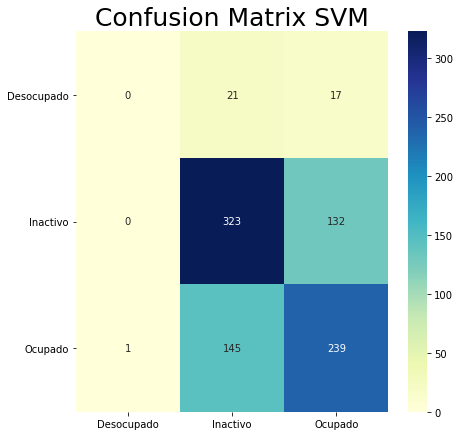

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix SVM",fontsize= 25)
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,5, 10,20,30,50] }
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid = parameters, refit = True, cv = 5)

In [44]:
clf_knn.fit(x_train_scaled, y_train.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 20, 30, 50]})

In [45]:
print("The best parameters are %s with a score of %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

The best parameters are {'n_neighbors': 50} with a score of 0.62


In [46]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
y_pred_knn = clf_knn.predict(x_test_scaled) 
print(y_pred_knn)

[1 1 2 1 1 2 1 2 2 2 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 2 2 2 2 1 1 1 2 2 1 1
 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1
 2 1 2 2 1 1 2 1 2 2 1 1 2 2 2 2 2 2 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2 2 2 2
 1 2 2 1 2 2 1 1 2 1 2 2 2 2 1 2 1 2 2 1 1 1 2 1 1 1 2 1 2 2 2 1 1 1 1 1 2
 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 2 1 2 1 1 2 2 2
 1 1 2 1 1 2 1 1 1 1 2 2 1 2 1 1 1 2 2 2 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 2
 2 1 2 2 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1
 1 2 2 1 1 2 2 1 1 2 1 2 1 2 1 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 1 1 1 1 1 2
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 2 1
 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 1 2 1 1 2 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2
 2 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 1
 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 2 1 2 1 2 1 1 1 1 1 2 2 1 1 2
 2 2 2 2 1 1 1 1 1 2 1 1 

In [47]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred_knn)
print("El accuracy es " + str(test_acc))

El accuracy es 0.6378132118451025


In [48]:
#Guardamos resultados
results_df = results_df.append({'Model':'KNN','Accuracy':test_acc},ignore_index=True)
results_df

,Model,Accuracy
0,SVM,0.640091
1,KNN,0.637813


In [49]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

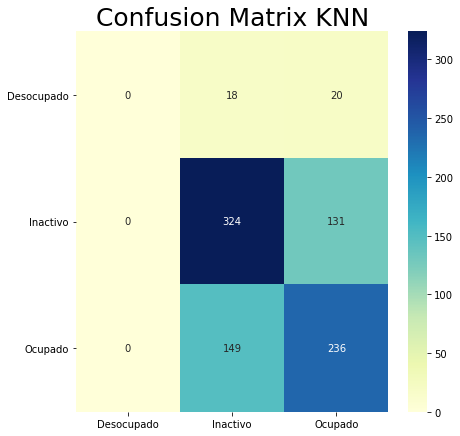

In [50]:
df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm_knn, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix KNN",fontsize= 25)
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[1, 10, 100, 1000],'penalty': ['l1']}
lr_model = LogisticRegression(random_state=0, solver='saga')
clf_lr = GridSearchCV(lr_model, param_grid = parameters, refit = True, cv = 5)

In [52]:
clf_lr.fit(x_train_scaled, y_train.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0, solver='saga'),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1']})

In [53]:
print("The best parameters are %s with a score of %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))

The best parameters are {'C': 1, 'penalty': 'l1'} with a score of 0.63


In [54]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
y_pred_lr = clf_lr.predict(x_test_scaled) 
print(y_pred_lr)

[1 1 2 2 1 2 1 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 2 2 2 2 2 1 2 1 2 1 1 2
 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2
 2 1 2 2 1 1 2 1 2 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 1 2 1 2 2 1 2 2 1 2 1 1 1 2 2 2 2 1 2 1 1 1 2 1 2 1 2 1 2 2
 2 2 1 1 2 2 1 2 1 1 2 2 2 1 1 2 1 2 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 1 2 1 1
 2 2 1 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 1 1 2 1 2 2 1 2 2 1
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 2
 2 1 2 2 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 2 2 2 1 1 1 1
 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 1 2 1 1 2 1 2 1 2
 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 2 1 2 1 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 1 1 1 2 2 1 2
 2 1 1 1 2 2 1 2 1 2 1 2 1 2 1 2 2 2 1 1 1 2 1 1 2 1 2 1 1 2 1 1 2 2 1 2 1
 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2 1 1 1 1 2 2 1 1 2
 2 1 2 1 1 1 1 1 1 2 1 1 

In [55]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred_lr)
print("El accuracy es " + str(test_acc))

El accuracy es 0.6241457858769932


In [56]:
#Guardamos resultados
results_df = results_df.append({'Model':'LReg','Accuracy':test_acc},ignore_index=True)
results_df

,Model,Accuracy
0,SVM,0.640091
1,KNN,0.637813
2,LReg,0.624146


In [57]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

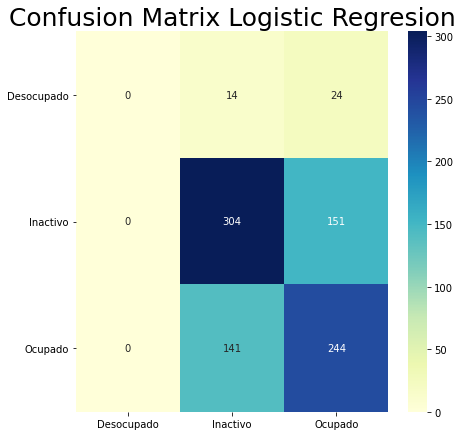

In [58]:
df_cm_lr = pd.DataFrame(cm_lr, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm_lr, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix Logistic Regresion",fontsize= 25)
plt.show()

## RESULTADOS

In [59]:
# Accuracy en tabla

results_df

,Model,Accuracy
0,SVM,0.640091
1,KNN,0.637813
2,LReg,0.624146


## Heatmap para cada Modelo

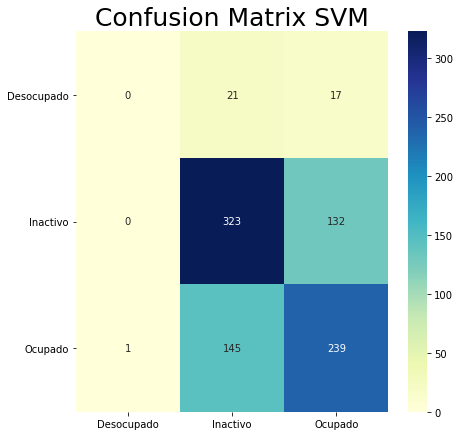

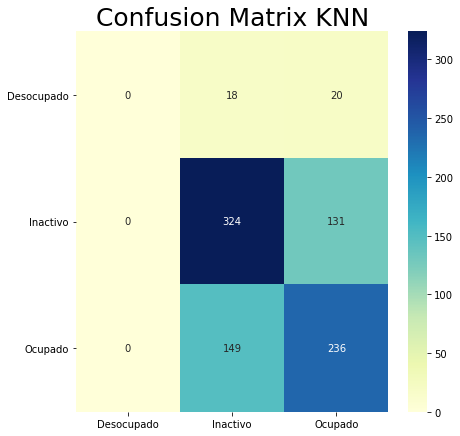

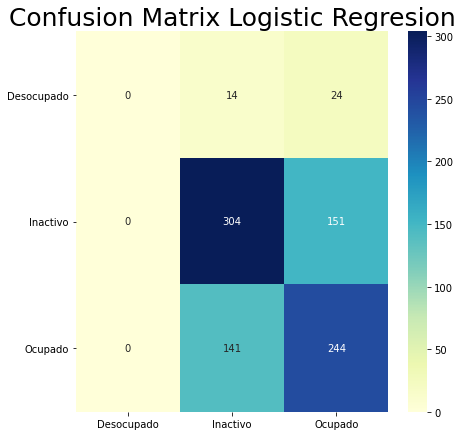

In [60]:
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix SVM",fontsize= 25)

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm_knn, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix KNN",fontsize= 25)

df_cm_lr = pd.DataFrame(cm_lr, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm_lr, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix Logistic Regresion",fontsize= 25)
plt.show()